In [1]:
from packages.script import *
import matplotlib.pyplot as plt
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
general_info = GeneralInfo()
pvalue_tests = PValueTests()
victims = Victims()

kaggle.com: authenticated


  7%|▋         | 2.00M/28.7M [00:00<00:01, 16.3MB/s]

100%|██████████| 28.7M/28.7M [00:01<00:00, 25.7MB/s]

### Baza danych dostępna pod adresem: https://www.kaggle.com/START-UMD/gtd

In [3]:
general_info.df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169422 entries, 0 to 181690
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            169422 non-null  int64  
 1   imonth           169422 non-null  int64  
 2   iday             169422 non-null  int64  
 3   country_txt      169422 non-null  object 
 4   region_txt       169422 non-null  object 
 5   city             169422 non-null  object 
 6   attacktype1_txt  169422 non-null  object 
 7   targtype1_txt    169422 non-null  object 
 8   weaptype1_txt    169422 non-null  object 
 9   nkill            169422 non-null  float64
 10  natlty1_txt      169422 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 15.5+ MB


### Wizualizacja ilości ofiar śmiertelnych w zależności od wybranej przez użytkownika kategorii oraz kontynentu w zależności od roku.

In [4]:
@widgets.interact_manual(
    category=[('Typ ataku','attacktype1_txt'), ('Typ celu','targtype1_txt'), ('Typ broni','weaptype1_txt')],
    region=[('Ameryka','America'), ('Afryka','Africa'), ('Azja','Asia'), ("Europa",'Europe')], year=(1970, 2017))
def plot(category='attacktype1_txt', region="Europe", year=1970, grid=True):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    plt.cla()
    plt.xticks(rotation=90)
    uniq, vals = general_info.select_data_year(year, region, category)
    plt.bar(uniq, height=vals)
    ax.grid(grid)

interactive(children=(Dropdown(description='category', options=(('Typ ataku', 'attacktype1_txt'), ('Typ celu',…

### Przedstawienie ilości ataków terrorystycznych z podziałem na regiony świata.

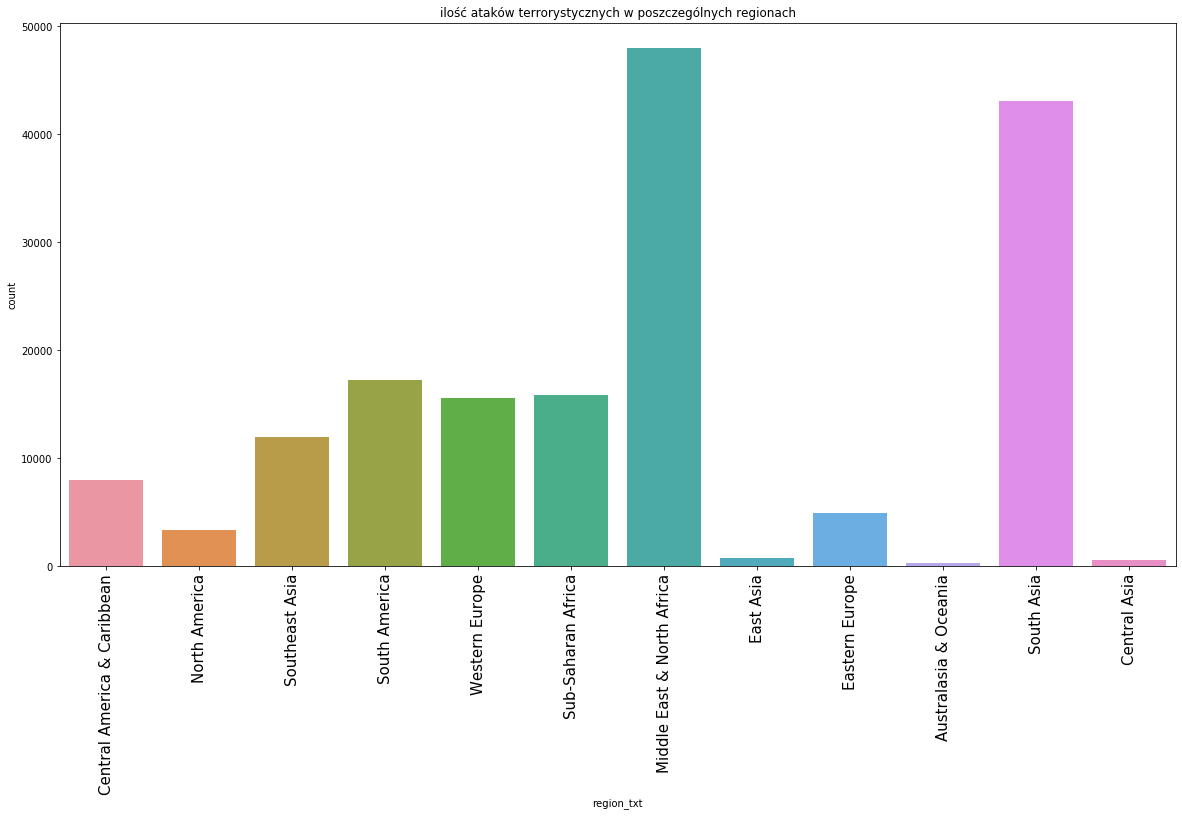

In [5]:
general_info.region_plots()

### Wizualizacja wielkości statystycznych dla ilości śmierci w zależności od typu ataku terrorystycznego.

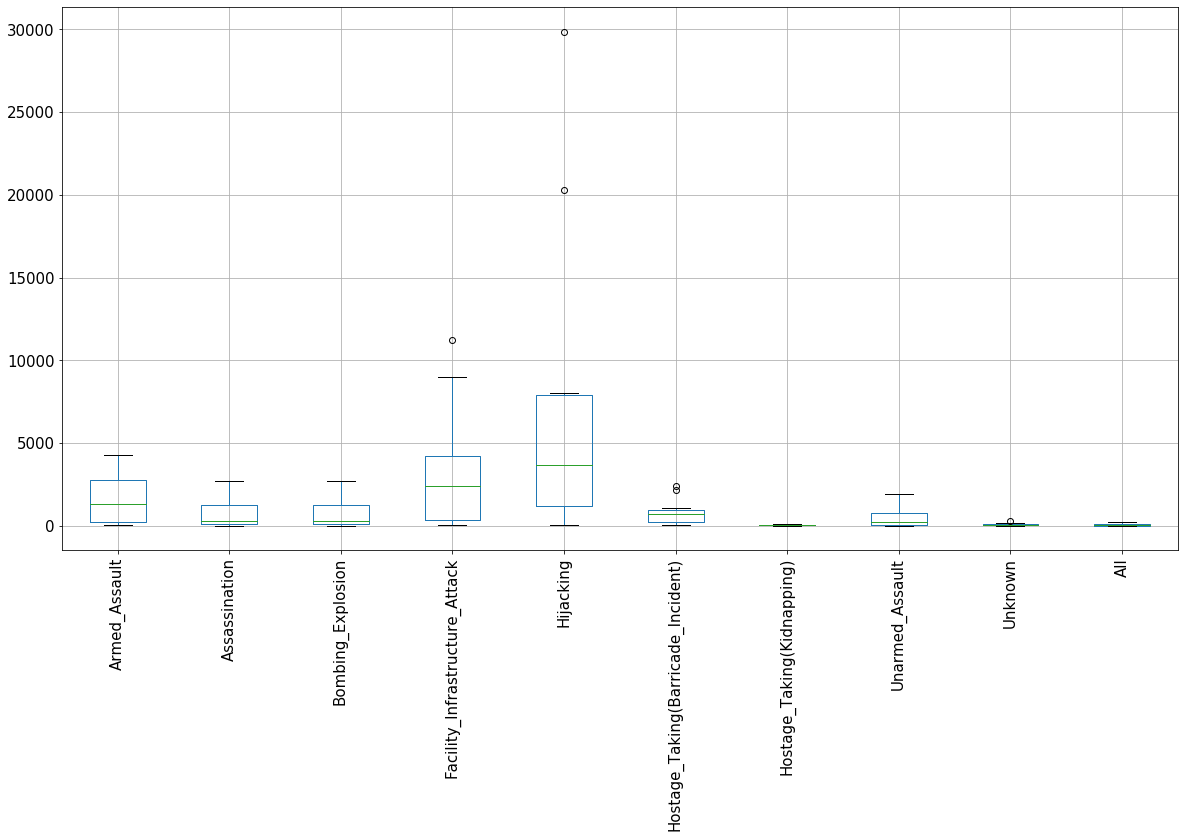

In [6]:
b = general_info.box_plots()

### Histogram ilości ofiar śmiertelnych wraz z rozkładami w zależności od kontynentu.

In [7]:
@widgets.interact_manual(region=[('Ameryka','America'), ('Afryka','Africa'), ('Azja','Asia'), ("Europa",'Europe')])
def plot(region="Europe"):
    general_info.distribution_data(region)

interactive(children=(Dropdown(description='region', index=3, options=(('Ameryka', 'America'), ('Afryka', 'Afr…

In [8]:
weapons = pvalue_tests.select_unique_weapons()
@widgets.interact_manual(year=(1970, 2017), weapons_1=weapons, weapons_2=weapons)
def plot(year=1970, weapons_1="Firearms", weapons_2="Explosives"):
    if weapons_1 != weapons_2:
        pvalue_tests.run(year)
        print(pvalue_tests.result_model)
    else:
        print("Wybierz inny rodzaj broni")

interactive(children=(IntSlider(value=1970, description='year', max=2017, min=1970), Dropdown(description='wea…

In [9]:
targets = victims.select_unique_target_types()
@widgets.interact_manual(region=[('Ameryka','America'), ('Afryka','Africa'), ('Azja','Asia'), ("Europa",'Europe')],
                         target_1=targets, target_2=targets)
def simulate(region="Europe", target_1="Business", target_2="Private Citizens & Property", target_str_1="", target_str_2=""):
    if target_str_1.strip() != "" and target_str_1.strip() != None:
        target_1 = target_str_1
    if target_str_2.strip() != "" and target_str_2.strip() != None:
        target_2 = target_str_2
    print(f"test bootstrapowy dla celów ataków terrorystycznych: {target_1} oraz {target_2}")
    victims.get_victims(region, target_1, target_2)

interactive(children=(Dropdown(description='region', index=3, options=(('Ameryka', 'America'), ('Afryka', 'Afr…